In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [2]:
invDf = pd.read_parquet('inventory.parquet', engine='pyarrow')
prodDf = pd.read_parquet('products.parquet', engine='pyarrow')
transDf = pd.read_parquet('transactions.parquet', engine='pyarrow')

In [3]:
invDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53315 entries, 0 to 53314
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   product_id  53315 non-null  int64
 1   color       53315 non-null  int64
 2   week        53315 non-null  int64
 3   year        53315 non-null  int64
 4   end_stock   53315 non-null  int64
dtypes: int64(5)
memory usage: 2.0 MB


In [4]:
prodDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  3724 non-null   int64  
 1   color       3724 non-null   int64  
 2   season      3724 non-null   int64  
 3   group1      3724 non-null   int64  
 4   group2      3724 non-null   int64  
 5   group3      3724 non-null   int64  
 6   group4      3724 non-null   int64  
 7   supplier    3724 non-null   int64  
 8   price       3724 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 262.0 KB


In [5]:
transDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219274 entries, 0 to 1219273
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   transaction_id  1219274 non-null  int64  
 1   date            1219274 non-null  object 
 2   shop            1219274 non-null  int64  
 3   product_id      1219274 non-null  int64  
 4   quantity        1219274 non-null  int64  
 5   price           1219274 non-null  float64
 6   price_paid      1219274 non-null  float64
 7   purchase_price  1219274 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 74.4+ MB


In [6]:
# Convertig date to date time object
transDf['date'] = pd.to_datetime(transDf.date)

In [7]:
transDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219274 entries, 0 to 1219273
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   transaction_id  1219274 non-null  int64         
 1   date            1219274 non-null  datetime64[ns]
 2   shop            1219274 non-null  int64         
 3   product_id      1219274 non-null  int64         
 4   quantity        1219274 non-null  int64         
 5   price           1219274 non-null  float64       
 6   price_paid      1219274 non-null  float64       
 7   purchase_price  1219274 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 74.4 MB


In [8]:
# checking for NaN values in our datasets
def checkNan(dataset):
    """A method to check for NaN values in our datasets

    Args:
        dataset (DataFrame): dataset to check for NaN values

    Returns:
        boolean: Returns boolean value if NaN values are found returns True otherwise False
    """
    return dataset.isnull().values.any()

list(map(lambda x: checkNan(x), [invDf,transDf,prodDf])) # we can see all the data present in the dataset(s) does not have any NaN values

[False, False, False]

#### Converting the values to float64

In [9]:
def convert_to_flaot(dataset):
    """A method to convert a dataset columns into a float64 values.

    Args:
        dataset (DataFrame): dataset to convert the colums into float64 values

    Returns:
        DataFrame: Converted dataframe
    """
    for col in dataset.columns:
        if col != 'date' and col != 'year':
            dataset[col] = dataset[col].astype('float64')
    return dataset
invDf,transDf,prodDf = (map(lambda x: convert_to_flaot(x), [invDf,transDf,prodDf]))

In [10]:
transDf

,transaction_id,date,shop,product_id,quantity,price,price_paid,purchase_price
0,-4.105354e+18,2018-06-27,3.467809e+18,7.525294e+18,-1.0,-61.969,-54.777,13.764
1,-8.459771e+18,2018-12-08,7.882037e+18,-1.087308e+18,1.0,105.369,105.369,21.111
2,3.140884e+18,2018-06-25,6.203040e+17,4.635203e+18,1.0,124.000,124.000,2.511
3,8.293949e+18,2018-05-24,5.882286e+18,3.315728e+17,1.0,37.200,30.318,16.368
4,-3.825516e+17,2019-06-29,3.467809e+18,4.394905e+18,-1.0,-74.400,-74.400,-40.796
...,...,...,...,...,...,...,...,...
1219269,8.207824e+18,2018-05-01,2.584792e+18,-5.838117e+18,1.0,15.500,13.950,46.779
1219270,5.570147e+18,2018-04-29,7.594814e+18,-7.782229e+17,1.0,15.500,15.500,21.390
1219271,3.712099e+18,2018-04-28,6.850805e+18,-7.782229e+17,1.0,15.500,10.850,21.390
1219272,5.773475e+17,2018-04-28,2.584792e+18,-5.838117e+18,1.0,15.500,15.500,46.779


In [11]:
invDf

,product_id,color,week,year,end_stock
0,5.013503e+18,2.836256e+17,26.0,2018,467.0
1,5.013503e+18,2.836256e+17,35.0,2018,83.0
2,5.013503e+18,2.836256e+17,37.0,2018,74.0
3,5.013503e+18,2.836256e+17,28.0,2018,306.0
4,5.013503e+18,2.836256e+17,25.0,2018,570.0
...,...,...,...,...,...
53310,3.737074e+18,-1.096658e+18,43.0,2018,-1.0
53311,6.472937e+18,4.434393e+18,35.0,2019,-1.0
53312,6.472937e+18,4.434393e+18,37.0,2019,-1.0
53313,6.472937e+18,4.434393e+18,36.0,2019,-1.0


In [12]:
invDf

,product_id,color,week,year,end_stock
0,5.013503e+18,2.836256e+17,26.0,2018,467.0
1,5.013503e+18,2.836256e+17,35.0,2018,83.0
2,5.013503e+18,2.836256e+17,37.0,2018,74.0
3,5.013503e+18,2.836256e+17,28.0,2018,306.0
4,5.013503e+18,2.836256e+17,25.0,2018,570.0
...,...,...,...,...,...
53310,3.737074e+18,-1.096658e+18,43.0,2018,-1.0
53311,6.472937e+18,4.434393e+18,35.0,2019,-1.0
53312,6.472937e+18,4.434393e+18,37.0,2019,-1.0
53313,6.472937e+18,4.434393e+18,36.0,2019,-1.0


## Visualising individual datasets

### Considering inventory dataset

In [13]:
# Check number of time series and lengths
print("Number of producuts is {}.".format(len(invDf.groupby(["product_id"]).groups.keys())))
print("Number of color is {}.".format(len(invDf.groupby(["color"]).groups.keys())))
print("Number of time series is {}.".format(len(invDf.groupby(["product_id", "color"]).groups.keys())))
print("\nLength distribution of the time series:")
print(invDf.groupby(["product_id", "color"]).size().describe())

Number of producuts is 744.
Number of color is 193.
Number of time series is 1093.

Length distribution of the time series:
count    1093.000000
mean       48.778591
std        29.186222
min         1.000000
25%        24.000000
50%        48.000000
75%        63.000000
max       104.000000
dtype: float64


#### Analysis

##### Considering the inventory dataset

In [14]:
prod_color_count_df = pd.DataFrame({'count' : invDf.groupby(["product_id", "color"] ).size()}).reset_index()

In [15]:
prod_color_count_df.head(3)

,product_id,color,count
0,-9.205752e+18,-2.120051e+18,2
1,-9.074209e+18,9.836474e+17,22
2,-9.074209e+18,2.585526e+18,22


In [16]:
prod_color_count_df.tail(4)

,product_id,color,count
1089,9.148685e+18,-1.530129e+18,2
1090,9.179841e+18,-6.595543e+18,43
1091,9.179841e+18,1.436903e+18,104
1092,9.179841e+18,1.925120e+18,43


Text(0.5, 1.0, 'Product count')

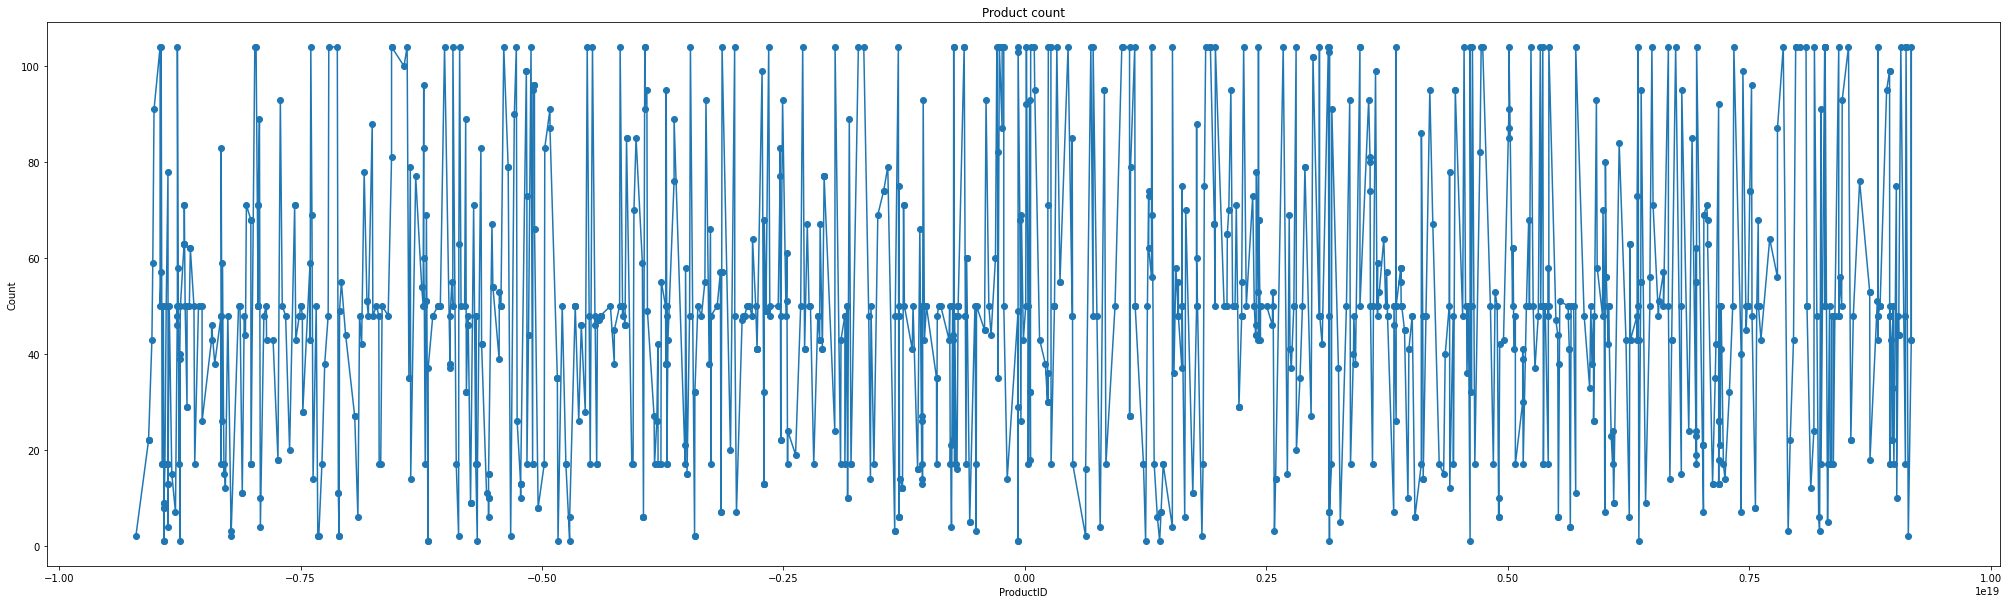

In [17]:
plt.figure(figsize=(35,10))
plt.plot(prod_color_count_df.product_id,prod_color_count_df['count'],marker='o')
plt.xlabel('ProductID')
plt.ylabel('Count')
plt.title('Product count')

#### The above graph tells the count of every prodcut with the color.

In [18]:
prod_endStock_count_df = pd.DataFrame({'count' : invDf.groupby(["product_id", "year"] ).end_stock.size()}).reset_index().sort_values(by=['year'])

In [19]:
prod_endStock_count_df

,product_id,year,count
841,6.352318e+18,2018,52
802,5.656741e+18,2018,50
432,-1.052292e+18,2018,52
434,-1.039272e+18,2018,43
435,-1.019105e+18,2018,150
...,...,...,...
456,-6.280762e+17,2019,104
460,-6.025259e+17,2019,156
461,-5.707506e+17,2019,10
445,-7.595315e+17,2019,4


In [20]:
y1,y2 = 0,0
for idx,val in prod_endStock_count_df.iterrows():
    if val['year'] == 2018: y1+= int(val['count'])
    else: y2+= int(val['count'])

Text(0.5, 1.0, 'Total End Stock per year')

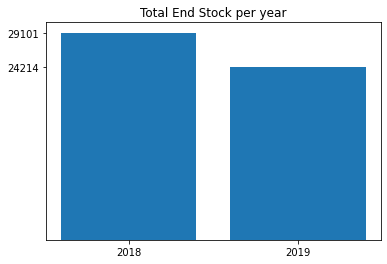

In [21]:
values = [('2018',y1),('2019',y2)]
labels, val = zip(*values)
xs = np.arange(len(labels)) 

plt.bar(xs, val)
plt.xticks(xs, labels)
plt.yticks(val)
plt.title('Total End Stock per year')

#### We can say that sales did not go as expected in the year 2018 compared to the year 2019.

##### Considering the transaction dataset

In [22]:
transDf.head(3)

,transaction_id,date,shop,product_id,quantity,price,price_paid,purchase_price
0,-4.105354e+18,2018-06-27,3.467809e+18,7.525294e+18,-1.0,-61.969,-54.777,13.764
1,-8.459771e+18,2018-12-08,7.882037e+18,-1.087308e+18,1.0,105.369,105.369,21.111
2,3.140884e+18,2018-06-25,6.203040e+17,4.635203e+18,1.0,124.000,124.000,2.511


#### Unsupervised learning

In [23]:
# Grouping the transaction id based on shop
trans_count_based_shop = pd.DataFrame({'count' : transDf.groupby(["transaction_id",'shop'] ).shop.size()}).reset_index()

In [24]:
trans_count_based_shop

,transaction_id,shop,count
0,-9.223361e+18,3.467809e+18,1
1,-9.223341e+18,3.467809e+18,1
2,-9.223335e+18,5.557508e+18,1
3,-9.223332e+18,-2.605118e+18,2
4,-9.223301e+18,5.557508e+18,1
...,...,...,...
979763,9.223282e+18,3.467809e+18,1
979764,9.223300e+18,5.557508e+18,1
979765,9.223305e+18,5.557508e+18,2
979766,9.223308e+18,5.557508e+18,1


In [25]:
tot_trans_per_shop = pd.DataFrame({'Total' : trans_count_based_shop.groupby('shop')['count'].apply(sum)}).reset_index()

In [26]:
tot_trans_per_shop

,shop,Total
0,-8.626987e+18,4536
1,-8.576863e+18,4544
2,-8.461798e+18,3363
3,-8.405650e+18,531
4,-8.276772e+18,3753
...,...,...
115,8.110360e+18,4320
116,8.386272e+18,2223
117,8.543104e+18,1953
118,8.887709e+18,4055


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit()

In [29]:
# label encoding the shop id since we dont want to display the shop id as float 64 format
tot_trans_per_shop.shop = list(le.fit_transform(tot_trans_per_shop.shop))

In [30]:
px.bar(tot_trans_per_shop,x="shop", y="Total",title="Total Transaction per Shop (2018-2019)")

### Shop *__number 95__* makes the best sales with *__396.524k__*

In [35]:
# Grouping the productID based on transaction_id to see total number of transactions per product.
top_products_transId = pd.DataFrame({'Top_Product' : transDf.groupby(["product_id"],sort=False).transaction_id.count()}).reset_index()

In [49]:
top_product_value = max(top_products_transId['Top_Product']) # fetching the top products transaction count value
top_product_value_id = top_products_transId[top_products_transId.Top_Product==top_product_value].product_id.iloc[0] # from top transaction fetching the prod id
f'Product ID with {top_product_value_id} has the maximum transaction that is sales with count of {top_product_value}'

'Product ID with -6.224672154067569e+18 has the maximum transaction that is sales with count of 16439'

In [51]:
max_product_df = transDf[transDf.product_id == top_product_value_id]

In [52]:
max_product_df

,transaction_id,date,shop,product_id,quantity,price,price_paid,purchase_price
548032,2.472018e+18,2018-05-21,-6.005759e+18,-6.224672e+18,-1.0,-61.969,-61.969,-21.824
548044,4.229118e+18,2018-05-22,-6.111851e+18,-6.224672e+18,-1.0,-61.969,-61.969,-21.824
548076,8.751697e+18,2018-05-23,3.467809e+18,-6.224672e+18,-1.0,-61.969,-61.969,-21.824
548077,9.523236e+17,2018-05-23,-2.605118e+18,-6.224672e+18,-1.0,-61.969,-61.969,-21.824
548078,3.404149e+18,2018-05-23,9.187231e+18,-6.224672e+18,-1.0,-61.969,-61.969,-21.824
...,...,...,...,...,...,...,...,...
1121832,-5.454908e+18,2018-08-21,3.467809e+18,-6.224672e+18,-1.0,-77.469,-77.469,-23.560
1121833,9.089889e+18,2018-08-20,3.467809e+18,-6.224672e+18,-1.0,-77.469,-77.469,-23.560
1121834,1.842575e+18,2018-08-21,3.467809e+18,-6.224672e+18,-1.0,-77.469,-77.469,-23.560
1121835,-2.517977e+18,2018-08-27,3.467809e+18,-6.224672e+18,-1.0,-77.469,-77.469,-23.560


In [55]:
max_product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16439 entries, 548032 to 1121836
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  16439 non-null  float64       
 1   date            16439 non-null  datetime64[ns]
 2   shop            16439 non-null  float64       
 3   product_id      16439 non-null  float64       
 4   quantity        16439 non-null  float64       
 5   price           16439 non-null  float64       
 6   price_paid      16439 non-null  float64       
 7   purchase_price  16439 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.1 MB


In [56]:
# importing meta's prophet algorithm for training
from prophet import Prophet

In [57]:
m = Prophet()

In [58]:
# Data cration for our algorithm. This takes the date as a feature and price as target class.
df = max_product_df[['date','purchase_price']]
# renaming the columns
df.columns = ['ds','y']

In [59]:
df.head(3)

,ds,y
548032,2018-05-21,-21.824
548044,2018-05-22,-21.824
548076,2018-05-23,-21.824


In [61]:
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/aneruthmohanasundaram/Documents/VUB/challenge2021_1/.venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -1001.76
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      56       12146.5    0.00230947       128.688   1.566e-05       0.001      112  LS failed, Hessian reset 
      89         12161    0.00134547       99.1703   6.741e-06       0.001      198  LS failed, Hessian reset 
      99       12162.8     0.0244148       306.727           1           1      208   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     198       12224.4    0.00105017       105.085   1.098e-05       0.001      372  LS failed, Hessian reset 
     199       12224.5    0.00789831       183.625          10           1      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       12237.8    0.00207451       75.1641   8.247e-06       0.001      470  LS failed, Hessian reset 
     299       12245.9    0.00241235       91.9833       2.346   

In [68]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/aneruthmohanasundaram/Documents/VUB/challenge2021_1/.venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/aneruthmohanasundaram/Documents/VUB/challenge2021_1/.venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
556,2020-08-11,52.629428,-20.355031,117.328693
557,2020-08-12,51.990648,-23.048219,116.087297
558,2020-08-13,52.447388,-19.726649,116.433006
559,2020-08-14,52.466303,-19.967564,117.738290
560,2020-08-15,57.021475,-17.415295,121.315663


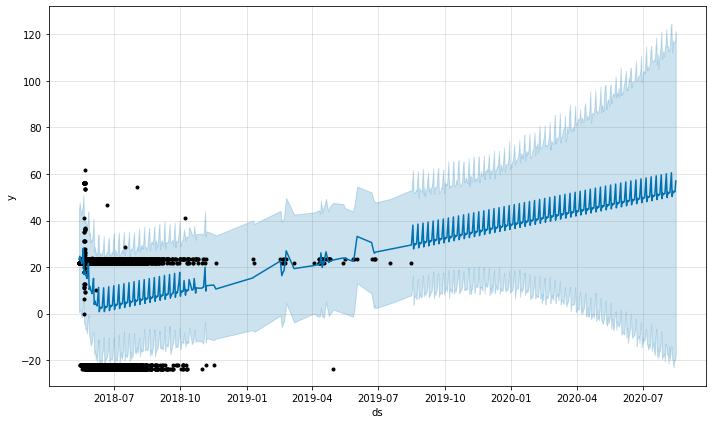

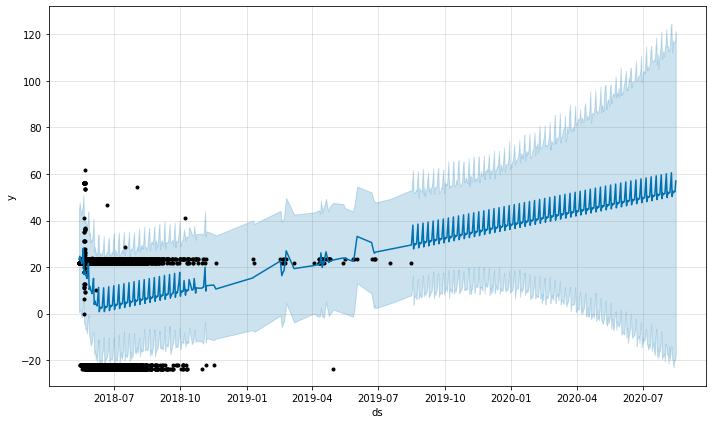

In [69]:
m.plot(forecast)

/Users/aneruthmohanasundaram/Documents/VUB/challenge2021_1/.venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



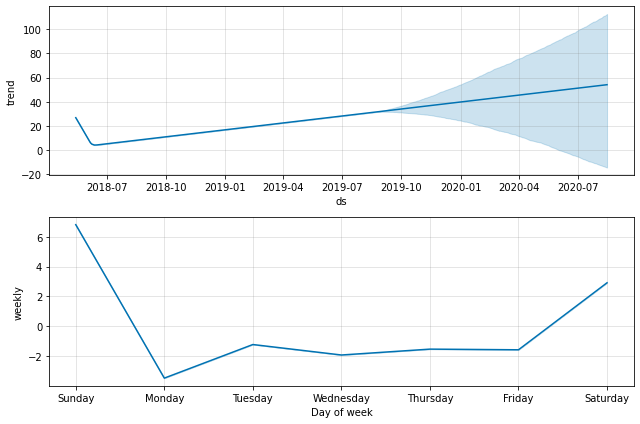

In [70]:
fig2 = m.plot_components(forecast)

In [71]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

/Users/aneruthmohanasundaram/Documents/VUB/challenge2021_1/.venv/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

